# Cats vs Dogs (Kaggle)
https://www.kaggle.com/c/dogs-vs-cats/

## Load images from directory

In [5]:
import os
current_dir = os.path.abspath(os.getcwd())

## Convert database for training, validation and testing

In [6]:
#creates a new folder for dogs and cats following the Keras/Tensorflow structure
folder = "/cats_and_dogs_dataset"
train_folder = current_dir + folder + "/train"
val_folder = current_dir + folder + "/validation"
test_folder = current_dir + folder + "/test"

# Make Tensorflow load the images to the RNA

In [7]:
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[]


In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(train_folder,
                                             image_size=(180, 180),
                                             batch_size=32)

validation_dataset = image_dataset_from_directory(val_folder,
                                                  image_size=(180, 180),
                                                  batch_size=32)

test_dataset = image_dataset_from_directory(test_folder,
                                            image_size=(180, 180),
                                            batch_size=32)

Found 17323 files belonging to 2 classes.


2022-05-12 20:26:49.193704: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2611 files belonging to 2 classes.
Found 5066 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    print(data_batch[0].shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
(180, 180, 3)


# Training the model

In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = keras.Sequential()
model.add(Rescaling(scale=1.0/255))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath="model3.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2022-05-12 20:26:58.583885: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 129777664 exceeds 10% of free system memory.
2022-05-12 20:26:59.021207: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62005248 exceeds 10% of free system memory.
2022-05-12 20:27:01.010383: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62005248 exceeds 10% of free system memory.
2022-05-12 20:27:02.139172: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 64888832 exceeds 10% of free system memory.
2022-05-12 20:27:02.139896: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 129777664 exceeds 10% of free system memory.


542/542 [==============================] - 2506s 5s/step - loss: 0.6463 - accuracy: 0.6173 - val_loss: 0.5784 - val_accuracy: 0.7020
Epoch 2/30
542/542 [==============================] - 2333s 4s/step - loss: 0.5110 - accuracy: 0.7494 - val_loss: 0.4532 - val_accuracy: 0.7767
Epoch 3/30
542/542 [==============================] - 2204s 4s/step - loss: 0.4128 - accuracy: 0.8108 - val_loss: 0.3873 - val_accuracy: 0.8250
Epoch 4/30
542/542 [==============================] - 1573s 3s/step - loss: 0.3322 - accuracy: 0.8535 - val_loss: 0.3949 - val_accuracy: 0.8322
Epoch 5/30
542/542 [==============================] - 1547s 3s/step - loss: 0.2596 - accuracy: 0.8890 - val_loss: 0.3411 - val_accuracy: 0.8602
Epoch 6/30
542/542 [==============================] - 1926s 4s/step - loss: 0.1900 - accuracy: 0.9213 - val_loss: 0.3692 - val_accuracy: 0.8502
Epoch 7/30
542/542 [==============================] - 1912s 4s/step - loss: 0.1317 - accuracy: 0.9476 - val_loss: 0.4367 - val_accuracy: 0.8506
Epo

# Results View

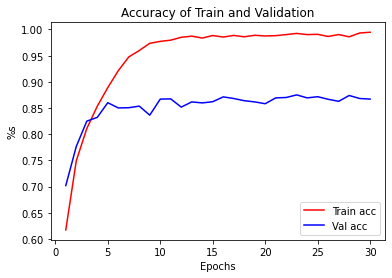

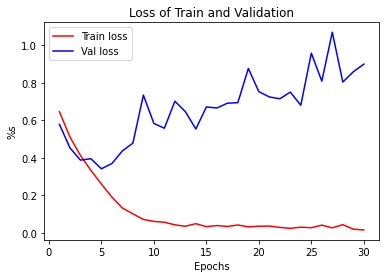

In [18]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Train acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Epochs")
plt.ylabel("%s")
plt.title("Accuracy of Train and Validation")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Train loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Epochs")
plt.ylabel("%s")
plt.title("Loss of Train and Validation")
plt.legend()
plt.show()

# Test Set Results

In [13]:
from tensorflow import keras
model = keras.models.load_model("model3.keras")

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

159/159 [==============================] - 35s 219ms/step - loss: 0.3278 - accuracy: 0.8660
Test accuracy: 0.866


# Individual Image Prediction

In [15]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()

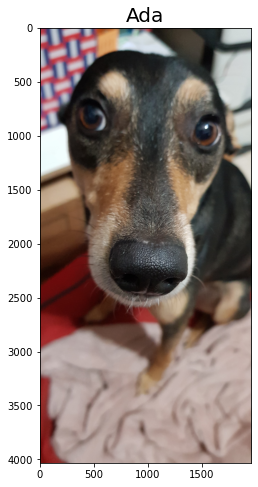

In [19]:
import cv2
ada_img = cv2.imread("other_images/ada.jpg")
ada_img = cv2.cvtColor(ada_img, cv2.COLOR_BGR2RGB)
#ada_img = cv2.resize(ada_img, (180, 180), interpolation = cv2.INTER_AREA)

showSingleImage(ada_img, "Ada", (12, 8))

In [21]:
from keras.preprocessing import image
import numpy as np

ada_img = image.load_img("other_images/gato.jpeg", target_size=(180, 180))
x = image.img_to_array(ada_img)
x = np.expand_dims(x, axis=0)
pred=(model.predict(x) > 0.5).astype('int32')[0][0]

if pred == 1:
    print("Dog")
else:
    print("Cat")
    
print(model.predict(x))

Cat
[[0.10463685]]


# References

* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://stackoverflow.com/questions/3430372/how-do-i-get-the-full-path-of-the-current-files-directory
* https://www.geeksforgeeks.org/python-list-files-in-a-directory/
* https://pynative.com/python-random-sample/
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://www.mygreatlearning.com/blog/keras-tutorial/
* https://www.machinecurve.com/index.php/2020/03/30/how-to-use-conv2d-with-keras/
* https://www.pyimagesearch.com/2021/06/30/how-to-use-the-modelcheckpoint-callback-with-keras-and-tensorflow/